In [1]:
from matplotlib import pyplot as plt
import numpy as np
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')
print(data)
years = data[:,0]

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


Plot the populations for the years in the period. Add legend and axis labels to the plot.

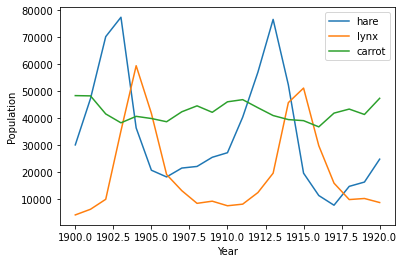

In [2]:
plt.plot(years, data[:,1], label='hare')
plt.plot(years, data[:,2], label='lynx')
plt.plot(years, data[:,3], label='carrot')

plt.xlabel('Year')
plt.ylabel('Population')

plt.legend()
plt.show()

Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

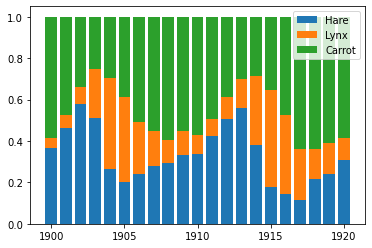

In [3]:
full_number = np.sum(data[:, 1:4], axis = 1)

plt.bar(years, data[:, 1] / full_number, label = 'Hare')
plt.bar(years, data[:, 2] / full_number, label = 'Lynx', bottom = data[:, 1] / full_number)
plt.bar(years, data[:, 3] / full_number, label = 'Carrot', bottom = (data[:, 2] + data[:, 1]) / full_number)

plt.legend()
plt.show()


Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

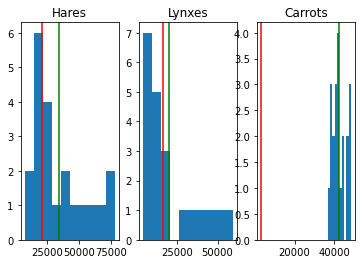

In [4]:
fig, hst = plt.subplots(1, 3)


hst[0].set(title = 'Hares')
hst[0].hist(data[:, 1], bins = 10)
hst[0].axvline(data[:, 1].mean(), c = 'green')
hst[0].axvline(data[:, 1].std(), c = 'r')

hst[1].set(title = 'Lynxes')
hst[1].hist(data[:, 2], bins = 10)
hst[1].axvline(data[:, 2].mean(), c = 'green')
hst[1].axvline(data[:, 2].std(), c = 'r')

hst[2].set(title = 'Carrots')
hst[2].hist(data[:, 3], bins = 10)
hst[2].axvline(data[:, 3].mean(), c = 'green')
hst[2].axvline(data[:, 3].std(), c = 'r')

plt.show()

Find which year each species had the largest population. Mark these years in the plot of populations.

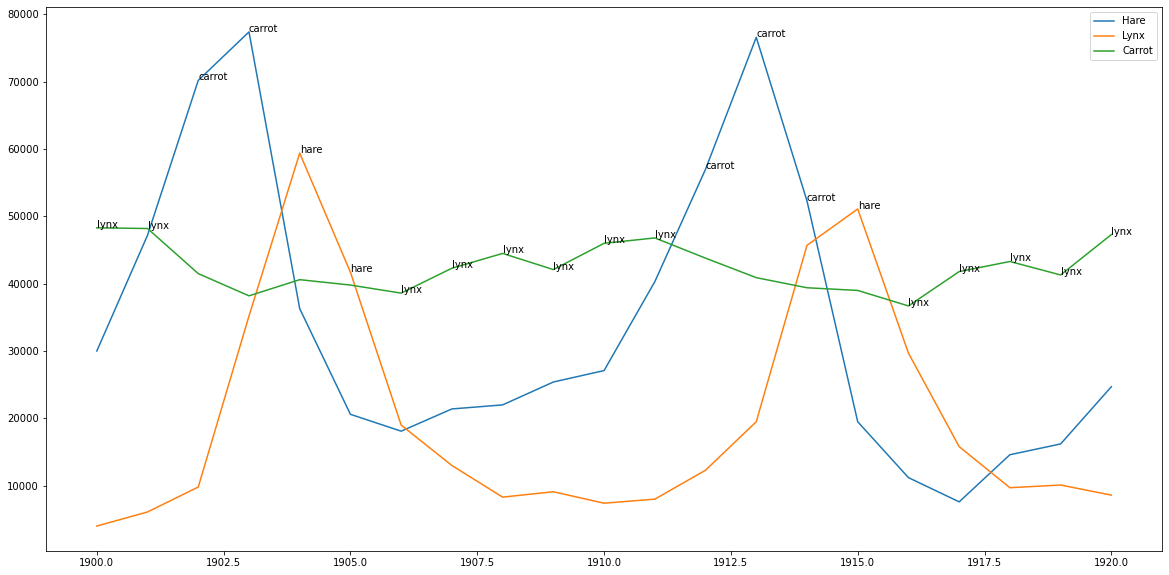

In [5]:
labels = ['hare','lynx','carrot']
list_of_names = []
list_of_max = []
for i in range(len(years)):
    string = data[i,1:4]
    ms = np.max(string)
    list_of_max.append(ms)
    for j in range(len(string)):
        if string[j] ==ms:
            list_of_names.append(labels[j-1])

plt.figure(figsize=(20, 10))
plt.plot(years, data[:, 1], label = 'Hare')
plt.plot(years, data[:, 2],  label = 'Lynx')
plt.plot(years, data[:, 3], label = 'Carrot')

for i in range(len(years)):
    plt.text(years[i], np.max(data[i,1:4]), list_of_names[i]) 
plt.legend()
plt.show()

Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

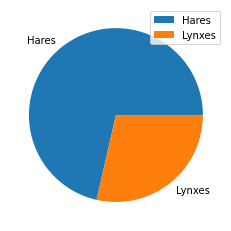

In [6]:
pie_list=[]
for i in range(len(years)):
    if data[i,1] >= data[i,2]:
        pie_list.append('H')
    else:
        pie_list.append('L')
H = pie_list.count('H')
L = pie_list.count('L')

plt.pie([H, L], labels = ['Hares','Lynxes'])
plt.legend()
plt.show()

Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

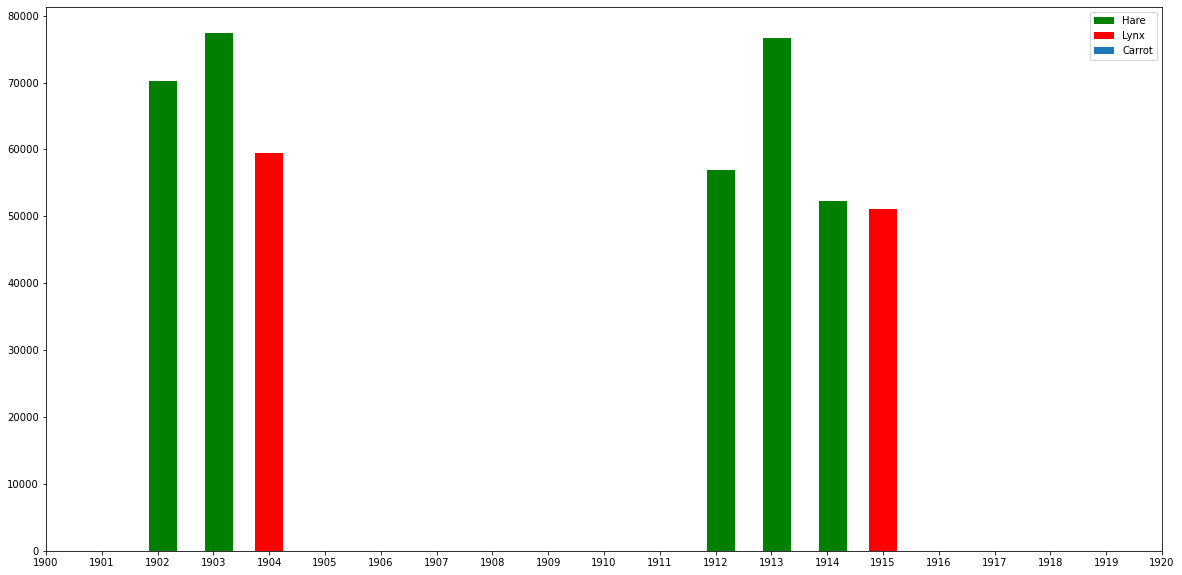

In [7]:
fig, ax = plt.subplots()

hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]
Ho50 = hares > 50000
Lo50 = lynxes > 50000
Co50 = carrots > 50000



plt.bar(years[Ho50] + 0.1, hares[Ho50], width = 0.5,color = 'green', label = 'Hare')
plt.bar(years[Lo50], lynxes[Lo50], width = 0.5,color = 'red', label = 'Lynx')
plt.bar(years[Co50] - 0.1, carrots[Co50], label = 'Carrot')


fig.set_size_inches(20, 10)
plt.legend()
plt.xticks(years)
plt.show()

Find the top 2 years for each species when they had the lowest populations.

In [8]:
H_m = np.argsort(hares)
print('for hares', int(years[H_m[0]]),int(years[H_m[1]])) 

L_m = np.argsort(lynxes)
print('for lynxes', int(years[L_m[0]]),int(years[L_m[1]]))

C_m = np.argsort(carrots)
print('for carrots', int(years[C_m[0]]), int(years[C_m[1]]))

for hares 1917 1916
for lynxes 1900 1901
for carrots 1916 1903


Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

Correlation coefficient:  -0.17801365941182956


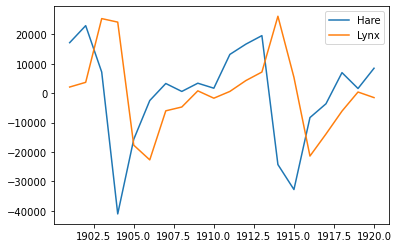

In [9]:
del_years = years[1:22]
del_har = hares[1:] - hares[:20]
del_lyn = lynxes[1:] - lynxes[:20]

plt.plot(del_years, del_har, label = 'Hare')
plt.plot(del_years, del_lyn,  label = 'Lynx')
plt.legend()
plt.show
print('Correlation coefficient: ',np.corrcoef(del_har,del_lyn)[1,0])

Show population of hares vs carrots and hares vs lynxes

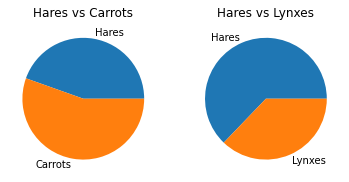

In [10]:
fig, p = plt.subplots(1, 2)

h_sum = np.sum(hares)
l_sum = np.sum(lynxes)
c_sum = np.sum(carrots)

p[0].set(title = 'Hares vs Carrots')
p[0].pie([h_sum, c_sum], labels = ['Hares','Carrots'])

p[1].set(title = 'Hares vs Lynxes')
p[1].pie([h_sum, l_sum], labels = ['Hares','Lynxes'])

plt.show()

Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

In [16]:
new_hares = hares[:20]
new_lynxes = lynxes[:20]
new_carrots = carrots[:20]

h_l_ratio = new_hares / new_lynxes
h_c_ratio = new_hares / new_carrots

predicted_hares = (np.mean(h_l_ratio)*lynxes[-1]+np.mean(h_c_ratio)*carrots[-1])/2
pred_hares = hares
#pred_hares[-1] = predicted_hares

print('Error: ',abs((hares[-1]-predicted_hares)/hares[-1]))


Error:  0.2803320120838993


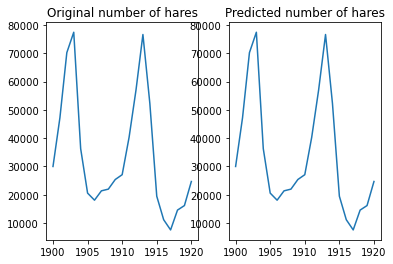

In [17]:
fig, pt = plt.subplots(1, 2)

pt[0].set(title = 'Original number of hares')
pt[0].plot(years, hares)

pt[1].set(title = 'Predicted number of hares')
pt[1].plot(years, pred_hares)

plt.show()